Reference:

- Data source:
    <https://data.worldbank.org/topic/climate-change?end=2018&start=1973>
- Custom scatterplot colors with colorbar in Matplotlib:
    <https://www.robotswillkillusall.org/posts/mpl-scatterplot-colorbar.html>
- Legend guide
    <https://matplotlib.org/users/legend_guide.html>
- Greenhouse gas
    <https://en.wikipedia.org/wiki/Greenhouse_gas>

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime
from matplotlib.ticker import FuncFormatter
# from jupyterthemes import jtplot

In [2]:
climate_1960_2018 = pd.read_csv('datasets/climate_1960_2018.csv')
climate_1960_2018.drop(columns='Unnamed: 63', inplace=True)

In [3]:
indicators = ['Population, total',
              'Electric power consumption (kWh per capita)',
              'Energy use (kg of oil equivalent per capita)']

elec_engy_1960_2018 = climate_1960_2018[climate_1960_2018['Indicator Name'].isin(indicators)]
elec_engy_1960_2018.fillna(0, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [4]:
elec_engy_1960_2018.drop(columns=['Country Code', 'Indicator Code'], inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [5]:
def df_4each_indicator(glb_df, indicator):
    df = glb_df[glb_df['Indicator Name'] == indicator]
    df.index = df['Country Name']
    df.drop(columns=['Country Name', 'Indicator Name'], inplace=True)
    df = df.T
    df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
    return df

In [6]:
pop_tot_1960_2018 = df_4each_indicator(elec_engy_1960_2018, 'Population, total')
elec_power_1960_2018 = df_4each_indicator(elec_engy_1960_2018,
                                          'Electric power consumption (kWh per capita)')
energy_use_1960_2018 = df_4each_indicator(elec_engy_1960_2018,
                                          'Energy use (kg of oil equivalent per capita)')

In [7]:
elec_power_tot_1960_2018 = pd.DataFrame(elec_power_1960_2018.values * pop_tot_1960_2018.values,
                                        columns=elec_power_1960_2018.columns,
                                        index=elec_power_1960_2018.index)

energy_use_tot_1960_2018 = pd.DataFrame(energy_use_1960_2018.values * pop_tot_1960_2018.values,
                                        columns=energy_use_1960_2018.columns,
                                        index=energy_use_1960_2018.index)

In [8]:
def millions_0dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-6)


def milles_dec(x, pos):
    """
    :param x: value
    :param pos: tick position
    """
    return '%1.0f' % (x * 1e-3)


FORMATTER_MILLIONS_0DEC = FuncFormatter(millions_0dec)
FORMATTER_MILLES = FuncFormatter(milles_dec)


## Electric power consumption (kWh per capita)

### Map

In [9]:
not_ctry_list = ['World', 'Post-demographic dividend', 'OECD members', 'High income', 'North America',
                 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified',
                 'Low income', 'Lower middle income', 'Low & middle income', 'Late-demographic dividend',
                 'Arab World', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend',
                 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia',
                 'Euro area', 'European Union', 'Middle East & North Africa', 'Middle income',
                 'Middle East & North Africa (excluding high income)', 'Pre-demographic dividend',
                 'South Asia', 'Sub-Saharan Africa (excluding high income)',
                 'East Asia & Pacific (IDA & IBRD countries)', 'Europe & Central Asia (IDA & IBRD countries)',
                 'Latin America & the Caribbean (IDA & IBRD countries)',
                 'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)',
                 'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
                 'Central Europe and the Baltics', 'Latin America & Caribbean (excluding high income)']

elec_power_pos = elec_power_1960_2018[elec_power_tot_1960_2018['World'] > 0]
elec_power_tot_pos = elec_power_tot_1960_2018[elec_power_tot_1960_2018['World'] > 0]
elec_power_top3 = ['Iceland', 'Norway', 'Bahrain']
elec_power_exclu = not_ctry_list + elec_power_top3

In [10]:
import geopandas as gpd

assert 'naturalearth_lowres' in gpd.datasets.available
datapath = gpd.datasets.get_path('naturalearth_lowres')
gdf = gpd.read_file(datapath)
gdf.rename(columns={'name':'Country'}, inplace=True)

In [11]:
gdf['Country'] = gdf['Country'].replace({'United States of America':'United States',
                                         'Bosnia and Herz.':'Bosnia and Herzegovina',
                                         'Central African Rep.':'Central African Republic',
                                         'Congo':'Congo, Rep.',
                                         'Dem. Rep. Congo':'Congo, Dem. Rep.',
                                         'Dominican Rep.':'Dominican Republic',
                                         'Egypt':'Egypt, Arab Rep.',
                                         'Iran':'Iran, Islamic Rep.',
                                         'Kyrgyzstan':'Kyrgyz Republic',
                                         'Russia':'Russian Federation',
                                         'Solomon Is.':'Solomon Islands',
                                         'Brunei':'Brunei Darussalam',
                                         'Czechia':'Czech Republic',
                                         'Eq. Guinea':'Equatorial Guinea',
                                         'S. Sudan':'South Sudan',
                                         'Slovakia':'Slovak Republic',
                                         'Syrian Arab Republic':'Syria',
                                         'Venezuela':'Venezuela, RB',
                                         'Yemen':'Yemen, Rep.',
                                         'eSwatini':'Eswatini'})

In [12]:
elec_power_tot_pos.rename(columns={'Bahamas, The':'Bahamas',
                           'Cote d\'Ivoire':'Côte d\'Ivoire',
                           'Gambia, The':'Gambia',
                           'Korea, Dem. People’s Rep.':'North Korea',
                           'Korea, Rep.':'South Korea',
                           'Lao PDR':'Laos',
                           'North Macedonia':'Macedonia'}, inplace=True)
elec_power_hist = elec_power_tot_pos.drop(columns=not_ctry_list).stack().reset_index().rename(
    columns={'level_0':'Date',
             'Country Name':'Country',
             0:'kWh_per_capita'})

elec_power_hist = pd.merge(elec_power_hist, gdf[['Country']], on='Country')
elec_power_hist.sort_values(['Country', 'Date'], inplace=True)
elec_power_hist.reset_index(drop=True, inplace=True)
# take only history after 2001
elec_power_hist = elec_power_hist[elec_power_hist.Date > '2001-01-01'].reset_index(drop=True)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [13]:
gdf_elec_hist = pd.merge(gdf, elec_power_hist[['Country']], on='Country')
gdf_elec_hist.drop_duplicates(subset=['pop_est', 'continent', 'Country', 'iso_a3', 'gdp_md_est'], inplace=True)
gdf_elec_hist = gdf_elec_hist.sort_values('Country').reset_index(drop=True)
gdf_elec_hist = gdf_elec_hist[['Country', 'gdp_md_est', 'geometry']]

In [14]:
gdf_elec_hist.head(2)

,Country,gdp_md_est,geometry
0,Afghanistan,64080.0,"POLYGON ((66.51860680528867 37.36278432875879,..."
1,Albania,33900.0,"POLYGON ((21.0200403174764 40.84272695572588, ..."


In [15]:
elec_power_hist.Country.nunique()

168

In [16]:
gdf_elec_hist.Country.nunique()

168

In [17]:
datetime_index = pd.DatetimeIndex(elec_power_hist['Date'].unique())

dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = np.array(dt_index_epochs).astype('U10')

In [18]:
styledata = {}

s = 0
e = 13 # 55
for i in gdf_elec_hist.index:
    df = pd.DataFrame(
        {'color': np.array(elec_power_hist.kWh_per_capita[s:e]),
         'opacity': np.array([1] * 13)}, #55
        index=dt_index
    )
    styledata[i] = df
    s += 13 # 55
    e += 13 # 55

In [19]:
max_color = max(elec_power_hist['kWh_per_capita'])
min_color = min(elec_power_hist['kWh_per_capita'])
max_opacity, min_opacity = 1, 1

import branca.colormap as cm

cmap = cm.LinearColormap(
    ['#009392', '#71be83', '#e9e29c', '#ed9c72', '#cf597e'],
    vmin=min_color, vmax=max_color
)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1

In [20]:
cmap

In [21]:
styledict = {
    str(ctry): data.to_dict(orient='index') for ctry, data in styledata.items()
}

In [22]:
import folium
from folium.plugins import TimeSliderChoropleth

elec_power_hist_map = folium.Map(location=[0, 0], zoom_start = 1.5, tiles='cartodbpositron')# cartodbpositron, Stamen Toner

TimeSliderChoropleth(
    gdf_elec_hist.to_json(),
    styledict=styledict
).add_to(elec_power_hist_map)

elec_power_hist_map
# elec_power_hist_map.save('elec_power_hist_map.html')

Although we lack data of some countries or regions, we can still find that the electric power consumption doesn't change a lot for almost countries or regions and their electric power consumption is not that much in general; except for China and United States.

### China
<https://en.wikipedia.org/wiki/Electricity_sector_in_China><br>
China's electric power industry is the world's largest electricity producer, passing the United States in 2011 after rapid growth since the early 1990s. Most of the electricity in China comes from coal, which accounted for 66% of the electricity generation mix in 2016. Coal-fired electricity production declined from 2013 to 2016 coinciding with a major boom in renewable energy, and a decline in GDP growth.

In recent history, China's power industry is characterized by fast growth and an enormous installed base. In 2014, it had the largest installed electricity generation capacity in the world with 1505 GW and generated 5583 TWh China also has the largest thermal power capacity, the largest hydropower capacity, the largest wind power capacity and the largest solar capacity in the world. Despite an expected rapid increase in installed capacity scheduled in 2014 for both wind and solar, and expected increase to 60 GW in nuclear by 2020, coal will still account between 65% and 75% of capacity in 2020.

China is the largest producer and consumer of coal in the world and is the largest user of coal-derived electricity. However, since 2014 coal as a percentage of the energy mix has fallen, declining from 64% in 2015 to 62% in 2016 according to the National Bureau of Statistics. Hydroelectricity is currently China's largest renewable energy source and the second overall after coal. China's installed hydro capacity in 2015 was 319 GW, up from 172 GW in 2009, including 23 GW of pumped storage hydroelectricity capacity. In 2015, hydropower generated 1,126 TWh of power, accounting for roughly 20% of China's total electricity generation.

With its large land mass and long coastline, China has exceptional wind resources: it is estimated China has about 2,380 GW of exploitable capacity on land and 200 GW on the sea. At the end of 2014, there was 114 GW of electricity generating capacity installed in China, more than the total nameplate capacity of China's nuclear power stations, (although capacity of wind power is not on par with capacity of nuclear power) and over the year 115,000 gigawatt-hours of wind electricity had been provided to the grid. In 2011, China's plan was “to have 100 gigawatts (GW) of on-grid wind power generating capacity by the end of 2015 and to generate 190 billion kilowatt hours (kWh) of wind power annually”. China has identified wind power as a key growth component of the country's economy; researchers from Harvard and Tsinghua University have found that China could meet all of their electricity demands from wind power through 2030.

In terms of nuclear power generation, China will advance from the moderate development strategy to accelerating development strategy. Nuclear power will play an even more important role in China's future power development. Especially in the developed coastal areas with heavy power load, nuclear power will become the backbone of the power structure there. China is the world's largest market for both photovoltaics and solar thermal energy. Since 2013 China has been the world's leading installer of solar photovoltaics. Solar PV in China is a growing industry with over 400 companies. In 2015, China became the world's largest producer of photovoltaic power, narrowly surpassing Germany. Of the 6,412 TWh electricity produced in China in 2017, 118.2 TWh was generated by solar power, equivalent to 1.84% of total electricity production.

### US
<https://en.wikipedia.org/wiki/Energy_in_the_United_States#Electricity><br>
The United States is the world's second largest producer and consumer of electricity. It consumes about 20% of the world's electricity supply.

The United States has an installed summer electricity generation capacity of 1,072.46 GW in 2017, down 1.8 GW from 2016. The US electricity generation was 4,034.3 TWh in 2017. The US's net imports were 56.31 TWh, for a total of 4,090.6 TWh of electrical energy use. Electrical energy generated from coal was 1,205.84 TWh (29.48%); natural and other gases, 1,3908.89 TWh (32.0%); nuclear, 804.95 TWh (19.68%); hydro, 300.33 TWh (7.34%); Renewables (other than hydro), 386.28 TWh (9.45%); imports less exports, 56.31 TWh (1.38%); petroleum, 21.39 TWh (0.52%); and miscellaneous (including pumped storage), 6.59 TWh (0.16%). The US's renewable sources (hydro reported separately) are wind, 254.30 TWh (6.22%); wood, 41.15 TWh (1.01%); other biomass, 21.61 TWh (0.53%); geothermal, 15.93 TWh (0.39%) and solar, 53.29 TWh (1.3%). Small-scale solar is estimated to have produced an additional 23.99 TWh. Natural gas electricity generation exceeded generation from coal for the first time in 2016 and continued in 2017.

Renewable energy in the United States accounted for 13.2% of the domestically produced electricity in 2014, and 11.2% of total energy generation. Renewable energy reached a major milestone in the first quarter of 2011, when it contributed 11.7% of total US energy production, surpassing nuclear energy production. Hydroelectric power is currently the largest producer of renewable energy in the US. It produced around 6.2% of the nation's total electricity in 2010 which was 60.2% of the total renewable energy in the US. The United States is the fourth largest producer of hydroelectricity in the world after China, Canada, and Brazil. US wind power's installed capacity now exceeds 65,000 MW and supplies 4% of the nation's electric power. The United States has some of the largest solar farms in the world. Solar Star is a 579-megawatt (MWAC) farm near Rosamond, California.

/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


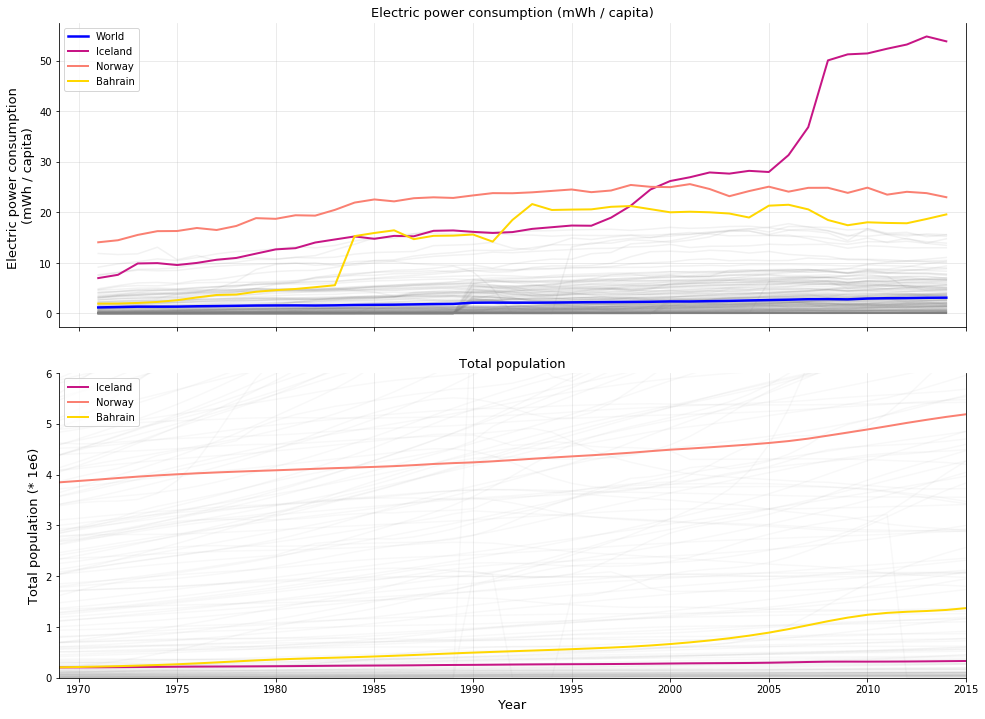

In [23]:
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)

ax00 = axarr[0]
ax00.set_title('Electric power consumption (mWh / capita)', fontdict={'fontsize': 13})

for col in elec_power_pos.drop(columns=elec_power_exclu).columns:
    ax00.plot(elec_power_pos.index,
              elec_power_pos[col],
              label=col,
              color='gray',
              alpha=0.1)
    
elec_is, = ax00.plot(elec_power_pos.index,
                      elec_power_pos['Iceland'],
                      color='mediumvioletred',
                      linewidth=2)
elec_no, = ax00.plot(elec_power_pos.index,
                      elec_power_pos['Norway'],
                      color='salmon',
                      linewidth=2)
elec_bh, = ax00.plot(elec_power_pos.index,
                      elec_power_pos['Bahrain'],
                      color='gold',
                      linewidth=2)

line_elec, = ax00.plot(elec_power_pos.index,
                       elec_power_pos['World'],
                       label='World',
                       color='blue',
                       linewidth=2.5)

ax00.set_ylabel('Electric power consumption \n(mWh / capita)', size=13)
ax00.yaxis.set_major_formatter(FORMATTER_MILLES)
ax00.legend(handles=[line_elec, elec_is, elec_no, elec_bh], loc=2)
ax00.spines['top'].set_visible(False)
ax00.grid(alpha=0.3)

ax10 = axarr[1]
ax10.set_title('Total population', fontdict={'fontsize': 13})

for col in pop_tot_1960_2018.drop(columns=elec_power_exclu).columns:
    ax10.plot(pop_tot_1960_2018.index,
              pop_tot_1960_2018[col],
              label=col,
              color='gray',
              alpha=0.05)

pop_is, = ax10.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Iceland'],
                     color='mediumvioletred',
                     linewidth=2)
pop_no, = ax10.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Norway'],
                     color='salmon',
                     linewidth=2)
pop_bh, = ax10.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Bahrain'],
                     color='gold',
                     linewidth=2)

ax10.set_xlabel('Year', size=13)
ax10.set_ylabel('Total population (* 1e6)', size=13)
ax10.set_xlim(left = '1969', right = '2015')
ax10.set_ylim(bottom = -50, top = 6000000)
ax10.yaxis.set_major_formatter(FORMATTER_MILLIONS_0DEC)
ax10.legend(handles=[pop_is, pop_no, pop_bh], loc=2)
ax10.spines['top'].set_visible(False)
ax10.grid(alpha=0.3, axis='x')

plt.subplots_adjust(hspace=0.15, wspace=0.2, top=0.95,
                    bottom=0.04, left=0.05, right=0.95)
plt.show()
# plt.savefig('electric-consumption-top3.png', bbox_inches='tight')

The world's electric power consumption(kWh per capita) increases 161%(1200.1 kWh to 3132.1 kWh) respectively between 1971 and 2014. For the electric power consumption(kWh per capita), the top 3 countries are Iceland, Norway and Bahrain. Considering it's the value per capita, so one reason why they are the "top 3" is their population is lower than others, which increases consumption per capita.

**Iceland**
<https://en.wikipedia.org/wiki/Iceland#Energy><br>
Renewable sources—geothermal and hydropower—provide effectively all of Iceland's electricity and around 85% of the nation's total primary energy consumption, with most of the remainder consisting of imported oil products used in transportation and in the fishing fleet. Iceland expects to be energy-independent by 2050. Iceland's largest geothermal power plants are Hellisheiði and Nesjavellir, while Kárahnjúkar Hydropower Plant is the country's largest hydroelectric power station. When the Kárahnjúkavirkjun started operating, Iceland became the world's largest electricity producer per capita. Iceland is one of the few countries that have filling stations dispensing hydrogen fuel for cars powered by fuel cells. It is also one of a few countries currently capable of producing hydrogen in adequate quantities at a reasonable cost, because of Iceland's plentiful renewable sources of energy.

**Norway**
<https://en.wikipedia.org/wiki/Electricity_sector_in_Norway><br>
Hydropower generation capacity is around 31 GW in 2014, when 131 TWh was produced; about 95% of total production. Of the total production in 2011 of 128 TWh; 122 TWh was from hydroelectric plants, 4795 GWh was from thermal power, and 1283 GWh was wind generated. In the same year, the total consumption was 114 TWh. Hydro production can vary 60 TWh between years, depending on amount of precipitation, and the remaining hydro potential is about 34 TWh.

The annual electricity consumption was about 26-27 MWh per inhabitant during 2004-2009 when the European union (EU15) average in 2008 was 7.4 MWh. Norway’s consumption of electricity was over three times higher per person compared to the EU 15 average in 2008. The domestic electricity supply promotes use of electricity, and it is the most common energy source for heating floors and hot water.

**Bahrain**
<https://www.worlddata.info/asia/bahrain/energy-consumption.php><br>
Bahrain could provide itself completely with self-produced energy. The total production of all electric energy producing facilities is 27 bn kWh, which is 103% of the countries own usage. Despite this, Bahrain is trading energy with foreign countries. Along with pure consumptions the production, imports and exports play an important role. Other energy sources such as natural gas or crude oil are also used.

## Energy use (kg of oil equivalent per capita)

### Map

In [24]:
energy_use_pos = energy_use_1960_2018[energy_use_1960_2018['World'] > 0]
energy_use_tot_pos = energy_use_tot_1960_2018[energy_use_1960_2018['World'] > 0]
energy_use_top3 = ['Qatar', 'Iceland', 'Trinidad and Tobago']
energy_use_exclu = not_ctry_list + energy_use_top3

In [25]:
energy_use_tot_pos.rename(columns={'Bahamas, The':'Bahamas',
                           'Cote d\'Ivoire':'Côte d\'Ivoire',
                           'Gambia, The':'Gambia',
                           'Korea, Dem. People’s Rep.':'North Korea',
                           'Korea, Rep.':'South Korea',
                           'Lao PDR':'Laos',
                           'North Macedonia':'Macedonia'}, inplace=True)
energy_use_hist = energy_use_tot_pos.drop(columns=not_ctry_list).stack().reset_index().rename(columns={'level_0':'Date',
                                                                                                   'Country Name':'Country',
                                                                                                   0:'kg_of_oil_equivalent_per_capita'})

energy_use_hist = pd.merge(energy_use_hist, gdf[['Country']], on='Country')
energy_use_hist.sort_values(['Country', 'Date'], inplace=True)
energy_use_hist.reset_index(drop=True, inplace=True)
# take only history after 2001
energy_use_hist = energy_use_hist[energy_use_hist.Date > '2001-01-01'].reset_index(drop=True)


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [26]:
gdf_energy_hist = pd.merge(gdf, energy_use_hist[['Country']], on='Country')
gdf_energy_hist.drop_duplicates(subset=['pop_est', 'continent', 'Country', 'iso_a3', 'gdp_md_est'], inplace=True)
gdf_energy_hist = gdf_energy_hist.sort_values('Country').reset_index(drop=True)
gdf_energy_hist = gdf_energy_hist[['Country', 'gdp_md_est', 'geometry']]

In [27]:
datetime_index = pd.DatetimeIndex(energy_use_hist['Date'].unique())

dt_index_epochs = datetime_index.astype(int) // 10**9
dt_index = np.array(dt_index_epochs).astype('U10')

In [28]:
styledata = {}

s = 0
e = 13 # 55
for i in gdf_energy_hist.index:
    df = pd.DataFrame(
        {'color': np.array(energy_use_hist.kg_of_oil_equivalent_per_capita[s:e]),
         'opacity': np.array([1] * 13)}, #55
        index=dt_index
    )
    styledata[i] = df
    s += 13 # 55
    e += 13 # 55

In [29]:
max_color = max(energy_use_hist['kg_of_oil_equivalent_per_capita'])
min_color = min(energy_use_hist['kg_of_oil_equivalent_per_capita'])
max_opacity, min_opacity = 1, 1

import branca.colormap as cm

cmap = cm.LinearColormap(
    ['#009392', '#71be83', '#e9e29c', '#ed9c72', '#cf597e'],
    vmin=min_color, vmax=max_color
)

def norm(x):
    return (x - x.min()) / (x.max() - x.min())

for i, data in styledata.items():
    data['color'] = data['color'].map(cmap)
    data['opacity'] = 1

In [30]:
styledict = {
    str(ctry): data.to_dict(orient='index') for ctry, data in styledata.items()
}

In [31]:
energy_use_hist_map = folium.Map(location=[0, 0], zoom_start = 1.5, tiles='cartodbpositron')# cartodbpositron, Stamen Toner

TimeSliderChoropleth(
    gdf_energy_hist.to_json(),
    styledict=styledict
).add_to(energy_use_hist_map)

energy_use_hist_map
# energy_use_hist_map.save('energy_use_hist_map.html')


Similar as the electric power consumption, we can find that the energy use doesn't change a lot for almost countries or regions and their energy use is not that much in general; except for China and United States.

### China
<https://en.wikipedia.org/wiki/Energy_policy_of_China><br>
Ensuring adequate energy supply to sustain economic growth has been a core concern of the Chinese government since 1949. Primary energy use in China was 26,250 TWh and 20 TWh per million persons in 2009. According to the International Energy Agency, the primary energy use grew 40% from 2004 to 2009.

The energy import was three times bigger in 2009 compared to 2004. The share of energy import of the primary energy use was 12% in 2009. China is also the world's largest renewable energy producer. China is the largest producer of hydroelectricity, solar power and wind power in the world.

In the industrial sector, six industries – electricity generation, steel, non-ferrous metals, construction materials, oil processing and chemicals – account for nearly 70% of energy use.

Coal remains the foundation of the Chinese energy system, covering close to 70 percent of the country's primary energy needs and representing 80 percent of the fuel used in electricity generation. China is the world's top coal producer and ranks third in the amounts of coal reserves. China consumes more coal than any other country. Analysis in 2016 shows that China's coal consumption appears to have peaked in 2014.

### US
<https://en.wikipedia.org/wiki/Energy_in_the_United_States><br>
The United States was the second-largest energy consumer in 2010 after China. The country is ranked seventh in energy consumption per capita after Canada and several small nations. Not included is the significant amount of energy used overseas in the production of retail and industrial goods consumed in the United States.

Most of this energy comes from fossil fuels: in 2010, data showed that 25% of the nation's energy originates from petroleum, 22% from coal, and 22% from natural gas. Nuclear energy supplied 8.4% and renewable energy supplied 8%, mainly from hydroelectric dams and biomass; however, this also includes other renewable sources like wind, geothermal, and solar. As of 2006, energy consumption had increased more rapidly than domestic energy production over the last 50 years in the nation (when they were roughly equal). This difference was largely met through imports.

Oil is one of the largest sources of energy in the United States. The United States influences world oil reserves for both growth and development. As the 20th century progressed, petroleum gained increasing importance by providing heating and electricity to the commercial and industrial sectors. Oil was also used in transportation; first for railroads and later for motor vehicles.

Natural gas was the largest source of energy production in the United States in 2016, representing 33% of all energy produced in the country. Natural gas has been the largest source of electrical generation in the United States since July 2015.

Generation of electricity is the largest user of coal, although its use is in decline. About 50% of electric power was produced by coal in 2005, declining to 30% in 2016. Electric utilities buy more than 90% of the coal consumed in the United States.

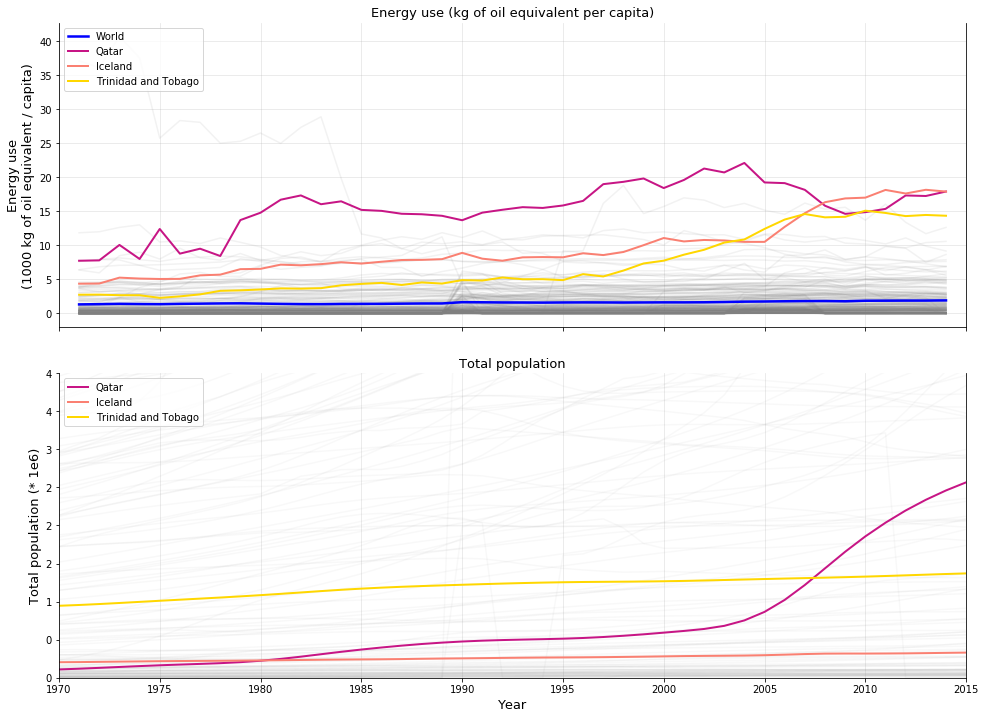

In [32]:
fig, axarr = plt.subplots(nrows=2, ncols=1, figsize=(14, 10), sharex=True)


ax00 = axarr[0]
ax00.set_title('Energy use (kg of oil equivalent per capita)', fontdict={'fontsize': 13})

for col in energy_use_pos.drop(columns=energy_use_exclu).columns:
    ax00.plot(energy_use_pos.index,
              energy_use_pos[col],
              label=col,
              color='gray',
              alpha=0.1)

energy_qa, = ax00.plot(energy_use_pos.index,
                       energy_use_pos['Qatar'],
                       color='mediumvioletred', # purple
                       linewidth=2)
energy_is, = ax00.plot(energy_use_pos.index,
                       energy_use_pos['Iceland'],
                       color='salmon',
                       linewidth=2)
energy_tt, = ax00.plot(energy_use_pos.index,
                       energy_use_pos['Trinidad and Tobago'],
                       color='gold',
                       linewidth=2)

line_energy, = ax00.plot(energy_use_pos.index,
                         energy_use_pos['World'],
                         label='World',
                         color='blue',
                         linewidth=2.5)

ax00.set_xlim(left=datetime.date(1970, 1, 1), right=datetime.date(2015, 1, 1))
ax00.set_ylabel('Energy use\n(1000 kg of oil equivalent / capita)', size=13)
ax00.yaxis.set_major_formatter(FORMATTER_MILLES)
ax00.legend(handles=[line_energy, energy_qa, energy_is, energy_tt], loc=2)
ax00.spines['top'].set_visible(False)
ax00.grid(alpha=0.3)

ax01 = axarr[1]
ax01.set_title('Total population', fontdict={'fontsize': 13})

for col in pop_tot_1960_2018.drop(columns=energy_use_exclu).columns:
    ax01.plot(pop_tot_1960_2018.index,
              pop_tot_1960_2018[col],
              label=col,
              color='gray',
              alpha=0.05)

pop_qa, = ax01.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Qatar'],
                     color='mediumvioletred', # purple
                     linewidth=2)
pop_is, = ax01.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Iceland'],
                     color='salmon',
                     linewidth=2)
pop_tt, = ax01.plot(pop_tot_1960_2018.index,
                     pop_tot_1960_2018['Trinidad and Tobago'],
                     color='gold',
                     linewidth=2)

ax01.set_xlabel('Year', size=13)
ax01.set_ylabel('Total population (* 1e6)', size=13)
ax01.set_ylim(bottom = -50, top = 4000000)
ax01.yaxis.set_major_formatter(FORMATTER_MILLIONS_0DEC)
ax01.legend(handles=[pop_qa, pop_is, pop_tt], loc=2)
ax01.spines['top'].set_visible(False)
ax01.grid(alpha=0.3, axis='x')


plt.subplots_adjust(hspace=0.15, wspace=0.2, top=0.95,
                    bottom=0.04, left=0.05, right=0.95)
plt.show()
# plt.savefig('energy-use-top3.png', bbox_inches='tight')

The world's energy use(kg of oil equivalent per capita) increases 44%(1337 kg to 1922.5 kg) respectively between 1971 and 2014. For the energy use(kg of oil equivalent per capita), the top 3 countries are Qatar, Iceland and Trinidad and Tobago. Considering it's the value per capita, so one reason why they are the "top 3" is their population is lower than others, which increases consumption per capita.

**Qatar**
<https://en.wikipedia.org/wiki/Energy_in_Qatar><br>
Since 2007, natural gas production in Qatar has significantly increased and is the primary fuel chosen for energy consumption within Qatar. In 2014, Qatar ranked as the fourth highest natural gas producer worldwide. In 2015, Qatar was ranked as the 17th top producer of crude oil worldwide at an approximate 1.532 million bbl/day. In 2013, Qatar also ranked as the 11th top exporter of crude oil at an approximate 1.303 million bbl/day. With high production of crude oil, Qatar is one of the few countries that has little crude oil dependence on other countries for domestic energy consumption.

In 2009 Qatar was the 7th top producer of natural gas (2.9%) in the world, 75% of the natural gas production was exported in 2009 (67/89 bm3).

Harnessing solar power has become an important objective for Qatar in recent years. By 2030, Qatar has set the goal of attaining 20% of its energy from solar power. The country is well-positioned to capitalize on photovoltaic systems, as it has a global horizontal irradiance value of approximately 2,140 kWh per square meter annually. Furthermore, the direct irradiance parameter is roughly 2,008 kWh per square meter annually, implying that it would be able to benefit from concentrated solar power as well.

**Iceland**
<https://en.wikipedia.org/wiki/Renewable_energy_in_Iceland><br>
About 85% of the total primary energy supply in Iceland is derived from domestically produced renewable energy sources. This is the highest share of renewable energy in any national total energy budget. In 2013 Iceland became a producer of wind energy. In 2015, renewable energy provided almost 100% of electricity production, with about 73% coming from hydropower and 27% from geothermal power. In 2016 geothermal energy provided about 65% of primary energy, the share of hydropower was 20%, and the share of fossil fuels (mainly oil products for the transport sector) was 15%.[1] The main use of geothermal energy is for space heating, with the heat being distributed to buildings through extensive district-heating systems. About 85% of all houses in Iceland are heated with geothermal energy.

**Trinidad and Tobago**
<https://en.wikipedia.org/wiki/Trinidad_and_Tobago><br>
Trinidad and Tobago is the region's leading exporter of oil and gas but imports of fossil fuels provided over 90% of the energy consumed by its CARICOM neighbours in 2008.

<https://www.worlddata.info/america/trinidad-and-tobago/energy-consumption.php><br>
Renewable energies include wind, solar, biomass and geothermal energy sources. This means all energy sources that renew themselves within a short time or are permanently available. Energy from hydropower is only partly a renewable energy. This is certainly the case with river or tidal power plants. Otherwise, numerous dams or reservoirs also produce mixed forms, e.g. by pumping water into their reservoirs at night and recovering energy from them during the day when there is an increased demand for electricity. Since it is not possible to clearly determine the amount of generated energy, all energies from hydropower are displayed separately.